<a href="https://colab.research.google.com/github/WENDELLDELIMA/Mestrado_Mackenzie_Aprendizado_Maquina_MLP_IBOVESPA/blob/main/Mackenzie_Aprendizado_de_maquina_MLP_X_PROPHET_GHG_PROTOCOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Libs



In [17]:
import pandas as pd

### Importação do Dataset

Foi utilizado o arquivo **`ghg-emissions.csv`**, proveniente do *Greenhouse Gas Protocol (GHG Protocol)*, equivalente ao **GEE (Gases de Efeito Estufa)** no Brasil.  
O dataset contém as emissões anuais de gases de efeito estufa por país, expressas em **milhões de toneladas de CO₂ equivalente (MtCO₂e)**, no período de **1990 a 2022**.  

As principais colunas são:  
- `iso`: código ISO do país.  
- `Country/Region`: nome do país ou região.  
- `unit`: unidade de medida (MtCO₂e).  
- Colunas de anos (1990–2022) com os valores de emissões.


In [147]:
ghg_emissions_df = pd.read_csv("ghg-emissions.csv")
ghg_emissions_df.head()

,iso,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,CHN,China,MtCO2e,3049.87,3196.90,3338.53,3581.08,3751.23,4148.03,4164.03,...,11175.26,11237.61,11085.85,11135.02,11376.55,11868.70,12109.18,12263.69,12852.14,12851.84
1,USA,United States,MtCO2e,5472.89,5424.70,5506.44,5615.49,5709.34,5777.03,5947.73,...,5795.20,5845.56,5735.74,5804.37,5755.15,5972.88,5851.35,5305.85,5591.52,5670.87
2,IND,India,MtCO2e,1126.56,1181.45,1208.14,1244.03,1293.11,1361.15,1410.07,...,2947.22,3134.57,3179.00,3247.88,3367.94,3506.66,3507.03,3326.20,3584.74,3805.03
3,RUS,Russia,MtCO2e,2618.14,2550.02,2382.89,2186.50,1952.47,1876.57,1832.29,...,1603.53,1596.32,1572.12,1697.90,1746.26,1840.91,1844.30,1759.19,1939.93,1886.05
4,BRA,Brazil,MtCO2e,1675.44,1696.97,1707.24,1717.63,1734.63,1761.52,1764.33,...,1410.09,1450.30,1437.66,1524.43,1550.01,1509.63,1533.43,1537.10,1598.81,1597.22


In [19]:
#pegando informacoes sobre os dados

ghg_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             195 non-null    object 
 1   Country/Region  195 non-null    object 
 2   unit            193 non-null    object 
 3   1990            193 non-null    object 
 4   1991            193 non-null    object 
 5   1992            193 non-null    float64
 6   1993            193 non-null    float64
 7   1994            193 non-null    float64
 8   1995            193 non-null    float64
 9   1996            193 non-null    float64
 10  1997            193 non-null    float64
 11  1998            193 non-null    float64
 12  1999            193 non-null    float64
 13  2000            193 non-null    float64
 14  2001            193 non-null    float64
 15  2002            193 non-null    float64
 16  2003            193 non-null    float64
 17  2004            193 non-null    flo



> Mesmo sem ter analisado os dados, aqui ja vemos que o dataframe esta em um modelo wide, onde os anos e suas emissoes estao como colunas.



In [20]:
# Transformar de wide -> long de forma direta
ghg_emissions_df = ghg_emissions_df.melt(
    id_vars=["iso", "Country/Region", "unit"],  # colunas fixas
    var_name="year",
    value_name="emissions"
)

# Converter ano para inteiro
ghg_emissions_df["year"] = ghg_emissions_df["year"].astype(int)

ghg_emissions_df.head()


,iso,Country/Region,unit,year,emissions
0,CHN,China,MtCO2e,1990,3049.87
1,USA,United States,MtCO2e,1990,5472.89
2,IND,India,MtCO2e,1990,1126.56
3,RUS,Russia,MtCO2e,1990,2618.14
4,BRA,Brazil,MtCO2e,1990,1675.44


In [21]:
# Renomear colunas para português
ghg_emissions_df = ghg_emissions_df.rename(columns={
    "iso": "codigo_iso",
    "Country/Region": "pais_regiao",
    "unit": "unidade",
    "year": "ano",
    "emissions": "emissoes"
})

ghg_emissions_df.head()

,codigo_iso,pais_regiao,unidade,ano,emissoes
0,CHN,China,MtCO2e,1990,3049.87
1,USA,United States,MtCO2e,1990,5472.89
2,IND,India,MtCO2e,1990,1126.56
3,RUS,Russia,MtCO2e,1990,2618.14
4,BRA,Brazil,MtCO2e,1990,1675.44



> MtCO₂e = Milhões de toneladas de CO₂ equivalente


> **Brasil 1990 → 1675.44 MtCO₂e**, isso significa que o Brasil emitiu cerca de 1.675 milhões de toneladas de gases de efeito estufa, convertidos em equivalentes de dióxido de carbono.

# Verificando Colunas que os dados são nulos

In [22]:
ghg_emissions_df.isnull().sum()


,0
codigo_iso,0
pais_regiao,0
unidade,66
ano,0
emissoes,66


In [25]:
# verificando quais paises que as emissoes sao nulas...

ghg_emissions_df[ghg_emissions_df["emissoes"].isnull()]


,codigo_iso,pais_regiao,unidade,ano,emissoes
193,Data source,Climate Watch,NaN,1990,NaN
194,Data for,Location: World. Sectors/Subsectors: Total inc...,NaN,1990,NaN
388,Data source,Climate Watch,NaN,1991,NaN
389,Data for,Location: World. Sectors/Subsectors: Total inc...,NaN,1991,NaN
583,Data source,Climate Watch,NaN,1992,NaN
...,...,...,...,...,...
6044,Data for,Location: World. Sectors/Subsectors: Total inc...,NaN,2020,NaN
6238,Data source,Climate Watch,NaN,2021,NaN
6239,Data for,Location: World. Sectors/Subsectors: Total inc...,NaN,2021,NaN
6433,Data source,Climate Watch,NaN,2022,NaN




> Essas informações são descritivos que estavam denro do CSV, sobre o mapeamento e setores dos dados. iremos remove-los.



In [26]:
#removendo linhas sem emissoes.
# Remove qualquer linha onde 'emissoes' seja NaN
ghg_emissions_df = ghg_emissions_df[ghg_emissions_df["emissoes"].notna()]


In [29]:
#verificando
ghg_emissions_df.isnull().sum()

,0
codigo_iso,0
pais_regiao,0
unidade,0
ano,0
emissoes,0


## 🌍 Marcos Históricos do Clima e sua Relevância para as Emissões

Ao longo da análise das séries temporais de emissões de gases de efeito estufa (GEE), alguns **anos-chave** se destacam por coincidirem com tratados e relatórios internacionais. Eles podem ser usados como **pontos de referência nos gráficos de somatórias das emissões**.

---

### 📌 1997 – Protocolo de Quioto
- Assinado no Japão, estabeleceu **metas obrigatórias de redução de emissões** para países desenvolvidos.  
- **Período de compromisso inicial**: 2008–2012.  
- Primeiro tratado internacional com **obrigações legais** sobre emissões de gases de efeito estufa.

---

### 📌 2005 – Entrada em vigor do Protocolo de Quioto
- Só passou a valer depois que a **Rússia ratificou**.  
- A partir daqui, começou a **cobrança efetiva das metas** para os países signatários.

---

### 📌 2007 – Relatório do IPCC (AR4)
- Reconhecimento quase unânime da comunidade científica sobre a **influência humana no aquecimento global**.  
- Representou um marco no **discurso político internacional** sobre mudanças climáticas.

---

### 📌 2015 – Acordo de Paris (COP21)
- Substituiu o Protocolo de Quioto.  
- Todos os países (desenvolvidos e em desenvolvimento) passaram a assumir **metas nacionais próprias (NDCs – Contribuições Nacionalmente Determinadas)**.  
- Objetivo: **limitar o aquecimento global a 1,5–2 °C** até 2100.  
- Ano de referência fundamental para análises de compromissos versus emissões reais.

---


## 🌍 Grupos de Países no Protocolo de Quioto

Para a análise de emissões, os países podem ser divididos em **três grandes grupos**, de acordo com o Protocolo de Quioto:

---

### 📌 Grupo 1 – Países com Metas Obrigatórias (Anexo I)
- **Descrição:** Países desenvolvidos que assumiram metas legais de redução de emissões no primeiro período de compromisso (2008–2012).  
- **Exemplos:** Alemanha, França, Reino Unido, Japão, Rússia, Canadá, Austrália.  
- **Observação:** Os **EUA assinaram, mas nunca ratificaram**, por isso ficam fora deste grupo.  

**Lista ISO3 (exemplo):**


In [30]:
grupo1_meta = [
    "AUS","AUT","BEL","BGR","CAN","HRV","CYP","CZE","DNK","EST","FIN","FRA",
    "DEU","GRC","HUN","ISL","IRL","ITA","JPN","LVA","LIE","LTU","LUX","MLT",
    "MCO","NLD","NZL","NOR","POL","PRT","ROU","SVK","SVN","ESP","SWE","CHE",
    "TUR","UKR","GBR","RUS"
]


---

### 📌 Grupo 2 – Países em Desenvolvimento (Sem Metas no 1º Período)
- **Descrição:** Assinaram e ratificaram o Protocolo, mas **não tinham metas obrigatórias de redução**.  
- **Participavam via mecanismos de desenvolvimento limpo (MDL)**.  
- **Exemplos:** Brasil, China, Índia, México, África do Sul.  

**Lista ISO3 (exemplo):**


In [31]:
grupo2_desenvolvimento = [
    "BRA","CHN","IND","MEX","ZAF","IDN","ARG","CHL","COL","PER",
    "EGY","THA","PHL","MYS","VNM","PAK","NGA"
]


---

### 📌 Grupo 3 – Não Ratificaram
- **Descrição:** Países que não ratificaram o Protocolo.  
- **Exemplo principal:** Estados Unidos.  

**Lista ISO3:**


In [32]:
grupo3_nao = ["USA"]


Agora que sabemos que temos 3 grupos de paises, iremos criar uma função para classificar a qual grupo pertence cada linha no pais.

In [33]:
def classificar_pais(iso):
    if iso in grupo1_meta:
        return "Com Metas (Anexo I)"
    elif iso in grupo2_desenvolvimento:
        return "Em Desenvolvimento (sem metas)"
    elif iso in grupo3_nao:
        return "Não Ratificaram"
    else:
        return "Outros"

ghg_emissions_df["grupo_quioto"] = ghg_emissions_df["codigo_iso"].apply(classificar_pais)


In [34]:
ghg_emissions_df.head()

,codigo_iso,pais_regiao,unidade,ano,emissoes,grupo_quioto
0,CHN,China,MtCO2e,1990,3049.87,Em Desenvolvimento (sem metas)
1,USA,United States,MtCO2e,1990,5472.89,Não Ratificaram
2,IND,India,MtCO2e,1990,1126.56,Em Desenvolvimento (sem metas)
3,RUS,Russia,MtCO2e,1990,2618.14,Com Metas (Anexo I)
4,BRA,Brazil,MtCO2e,1990,1675.44,Em Desenvolvimento (sem metas)


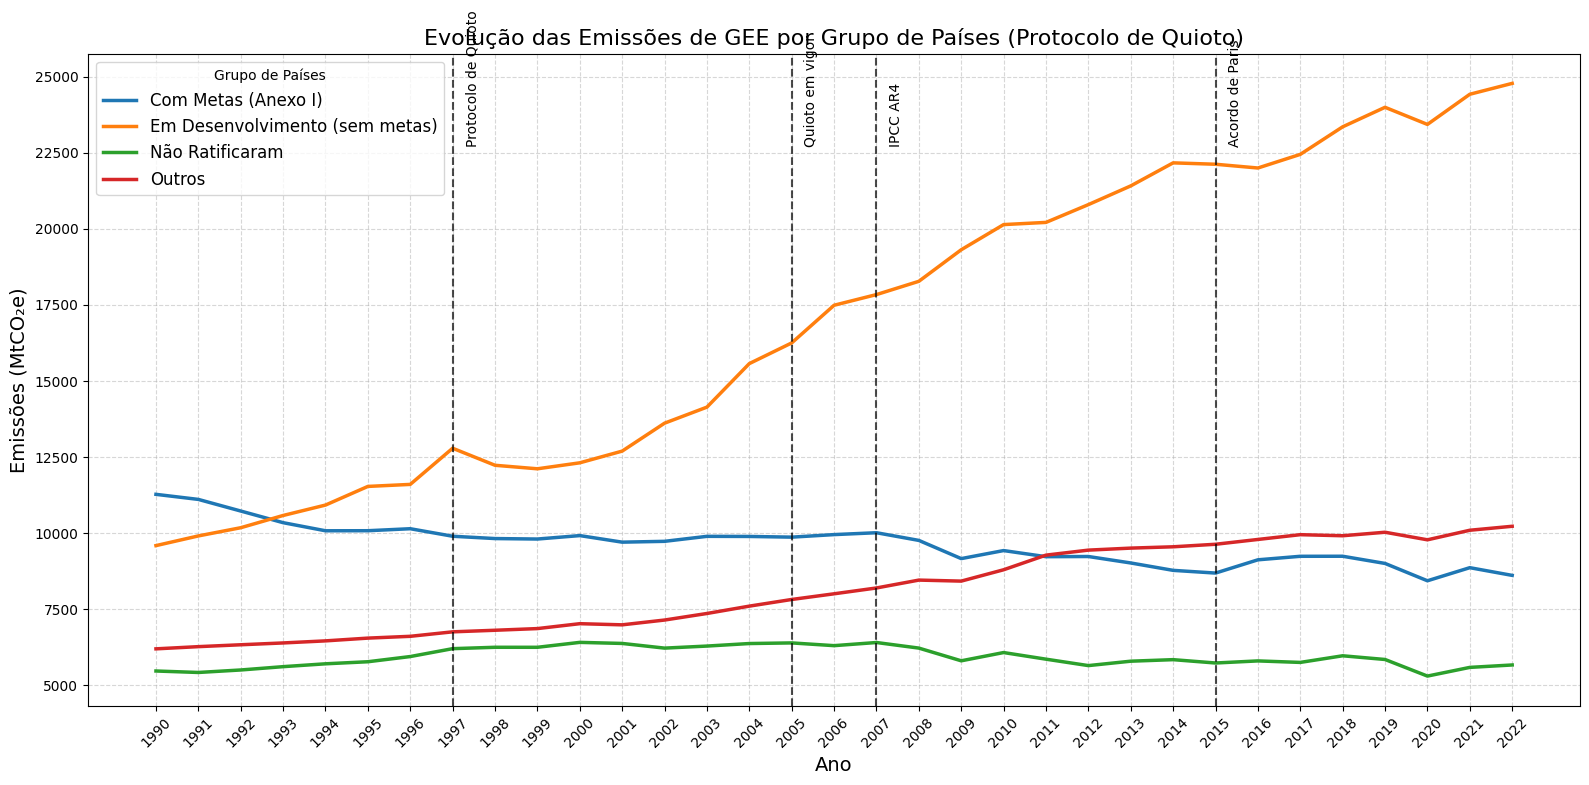

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a copy to avoid SettingWithCopyWarning
ghg_emissions_df_copy = ghg_emissions_df.copy()

# Replace 'false' with NaN and then drop rows with NaN in 'emissoes'
ghg_emissions_df_copy['emissoes'] = ghg_emissions_df_copy['emissoes'].replace('false', np.nan)
ghg_emissions_df_copy = ghg_emissions_df_copy.dropna(subset=['emissoes'])

# Ensure the 'emissoes' column is numeric before grouping and summing
ghg_emissions_df_copy['emissoes'] = pd.to_numeric(ghg_emissions_df_copy['emissoes'])

# Garantir que temos o dataframe agregado por ano e grupo
df_somas = (
    ghg_emissions_df_copy
    .groupby(["ano","grupo_quioto"])["emissoes"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(16,8))
sns.lineplot(data=df_somas, x="ano", y="emissoes", hue="grupo_quioto", linewidth=2.5)

# 📌 Adicionando marcos históricos (linhas verticais)
marcos = {
    1997: "Protocolo de Quioto",
    2005: "Quioto em vigor",
    2007: "IPCC AR4",
    2015: "Acordo de Paris"
}

for ano, evento in marcos.items():
    plt.axvline(x=ano, color="black", linestyle="--", alpha=0.7)
    plt.text(ano+0.3, df_somas["emissoes"].max()*0.92, evento, rotation=90, fontsize=10)

# ✅ Forçar todos os anos no eixo X
anos = sorted(df_somas["ano"].unique())
plt.xticks(anos, rotation=45)

# Ajustes do gráfico
plt.title("Evolução das Emissões de GEE por Grupo de Países (Protocolo de Quioto)", fontsize=16)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Emissões (MtCO₂e)", fontsize=14)
plt.legend(title="Grupo de Países", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


*da forma que vemos, estamos vendo apenas os numeros absolutos, o que não condiz com a verdade do grupo, precisamos criar uma medida que possamos mensurar, por espaco geometrico ou por numero de pessoas.*

In [54]:
# Simplificar população
populacao_df = populacao_df[["codigo_iso", "ano", "populacao"]]

# Merge emissões + população
ghg_emissions_df_copy = pd.merge(
    ghg_emissions_df_copy,
    populacao_df,
    on=["codigo_iso","ano"],
    how="inner"
)


In [59]:
# Converter emissões de MtCO2e para toneladas
df_merged["emissoes_t"] = df_merged["emissoes"] * 1_000_000

# Agregar por grupo e ano (usando soma de emissões e soma de população)
df_grp = (
    df_merged
    .groupby(["ano","grupo_quioto"])
    .agg(emissoes_Mt=("emissoes", "sum"),
         populacao=("populacao", "sum"))
    .reset_index()
)

# Calcular per capita corretamente
df_grp["percapita_t"] = (df_grp["emissoes_Mt"] * 1_000_000) / df_grp["populacao"]

display(df_grp.head())

,ano,grupo_quioto,emissoes_Mt,populacao,percapita_t
0,1990,Com Metas (Anexo I),11277.30,9.143128e+08,12.334182
1,1990,Em Desenvolvimento (sem metas),9592.62,3.024157e+09,3.171998
2,1990,Não Ratificaram,5472.89,2.496230e+08,21.924622
3,1990,Outros,6200.77,1.055292e+09,5.875882
4,1991,Com Metas (Anexo I),11110.69,9.185199e+08,12.096297


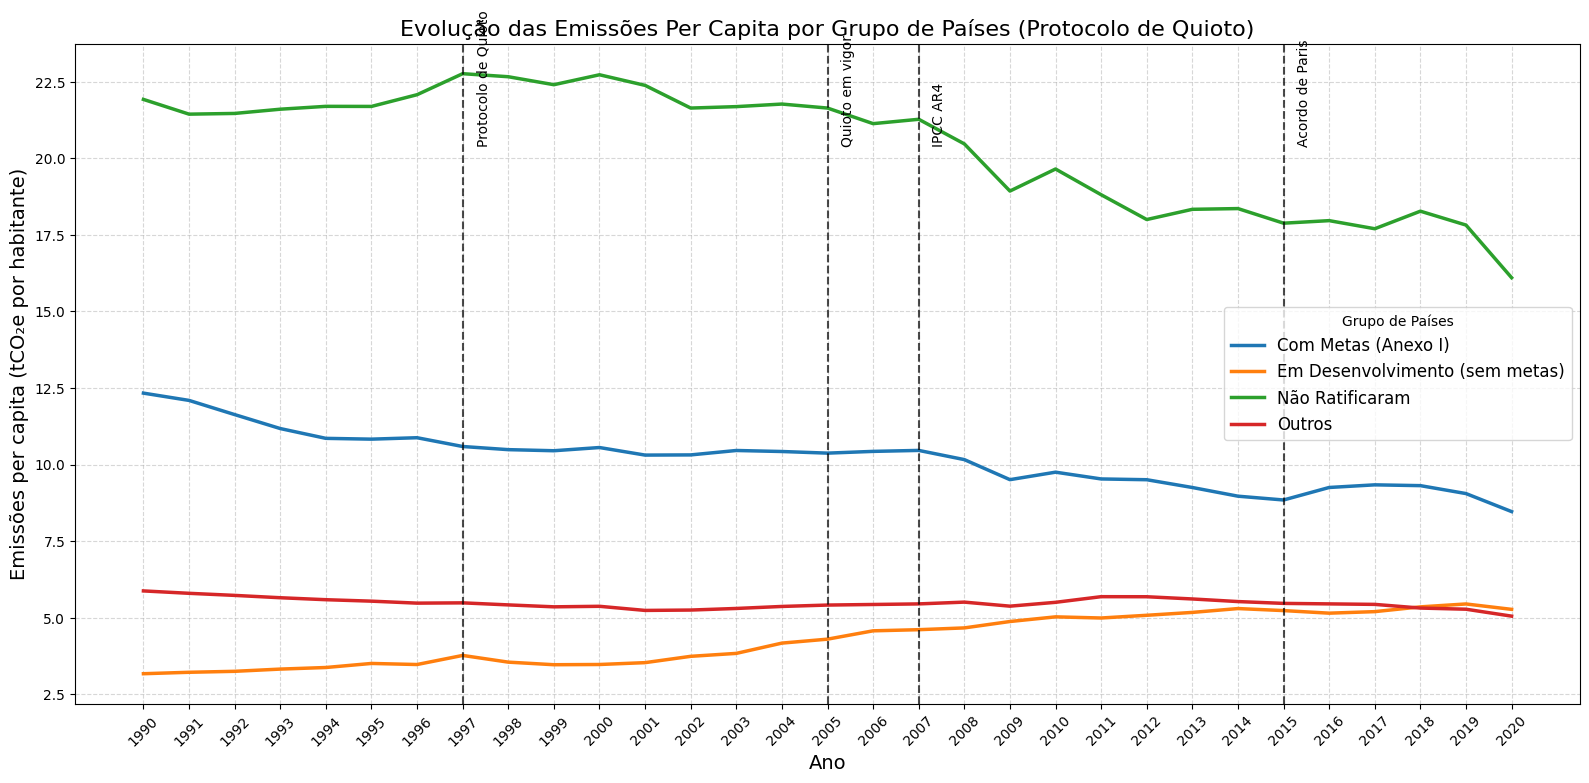

In [61]:
plt.figure(figsize=(16,8))
sns.lineplot(
    data=df_grp,  # ✅ aqui tem que ser df_grp
    x="ano", y="percapita_t",
    hue="grupo_quioto", linewidth=2.5
)

# 📌 Adicionando marcos históricos
for ano, evento in marcos.items():
    plt.axvline(x=ano, color="black", linestyle="--", alpha=0.7)
    plt.text(
        ano+0.3,
        df_grp["percapita_t"].max()*0.9,
        evento, rotation=90, fontsize=10
    )

plt.title("Evolução das Emissões Per Capita por Grupo de Países (Protocolo de Quioto)", fontsize=16)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Emissões per capita (tCO₂e por habitante)", fontsize=14)
plt.legend(title="Grupo de Países", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(sorted(df_grp["ano"].unique()), rotation=45)
plt.tight_layout()
plt.show()


## 📚 Referências e Contextualização

- **World Bank**. (2024). *CO₂ emissions (metric tons per capita)*.  
  O Banco Mundial fornece séries históricas de emissões de CO₂ per capita, medida em toneladas métricas por habitante.  
  Esses dados são amplamente utilizados em estudos de comparação internacional.  
  Disponível em: [https://data.worldbank.org/indicator/EN.ATM.CO2E.PC](https://data.worldbank.org/indicator/EN.ATM.CO2E.PC)

- **Our World in Data**. (2024). *CO₂ emissions per capita*.  
  Base consolidada que utiliza dados do **Global Carbon Project**, permitindo análises visuais e download de séries temporais.  
  Mostra claramente diferenças regionais: EUA > 15 t/hab, União Europeia entre 7–9 t/hab, China crescendo até 8 t/hab, Brasil estabilizado em torno de 2–3 t/hab.  
  Disponível em: [https://ourworldindata.org/grapher/co-emissions-per-capita](https://ourworldindata.org/grapher/co-emissions-per-capita)

- **EDGAR – Emissions Database for Global Atmospheric Research**. (2023). *GHG Emissions of All World Countries*.  
  Mantido pelo **Joint Research Centre (JRC)** da Comissão Europeia, traz dados consistentes de gases de efeito estufa (CO₂, CH₄, N₂O).  
  A base do EDGAR é usada em relatórios da ONU e IPCC, sendo referência para estimar compromissos internacionais.  
  Disponível em: [https://south.euneighbours.eu/wp-content/uploads/2023/09/ghg-emissions-of-all-world-countries-KJNA31658ENN_compressed.pdf](https://south.euneighbours.eu/wp-content/uploads/2023/09/ghg-emissions-of-all-world-countries-KJNA31658ENN_compressed.pdf)

- **IPCC – Intergovernmental Panel on Climate Change**. (2022). *AR6, WGIII, Chapter 2: Emissions Trends and Drivers*.  
  O AR6 apresenta a visão científica mais atualizada sobre as trajetórias de emissões.  
  Destaca que países desenvolvidos tiveram reduções relativas desde 1990, enquanto países em desenvolvimento aumentaram emissões absolutas, mas ainda com valores per capita mais baixos.  
  Disponível em: [https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-2](https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-2)

- **KAPSARC / World Bank**. (2024). *Global CO₂ Emissions: Total and Per Capita (Excluding LULUCF)*.  
  Esta base combina dados do Banco Mundial e de pesquisas energéticas globais, excluindo emissões relacionadas a uso da terra e florestas (LULUCF).  
  Permite observar com clareza as diferenças per capita entre blocos de países — EUA e Canadá > 15 t/hab, União Europeia ~8 t/hab, Brasil ~2, Índia ~2, China crescendo até ~8.  
  Disponível em: [https://data.kapsarc.org/explore/dataset/global-co2-emissions-total-per-capita-excluding-lulucf-world-bank](https://data.kapsarc.org/explore/dataset/global-co2-emissions-total-per-capita-excluding-lulucf-world-bank)

- **EDGAR – Emissions Database for Global Atmospheric Research**. (2020). *Fossil CO₂ emissions of all world countries*.  
  Relatório consolidado sobre emissões fósseis, fundamental para contextualizar compromissos do Protocolo de Quioto e do Acordo de Paris.  
  Segundo este relatório, a média global em 2019 foi de **~6,47 tCO₂e per capita**, valor usado como referência em negociações internacionais.  
  Disponível em: [https://edgar.jrc.ec.europa.eu/report_2020?vis=pop](https://edgar.jrc.ec.europa.eu/report_2020?vis=pop)


In [125]:
def plot_prophet_grupo(df, grupo, ano_treino_fim=2017, ano_fim=2030):
    d = df[df["grupo_quioto"]==grupo].copy()
    d = d[["ano","percapita_t"]].rename(columns={"ano":"ds","percapita_t":"y"})
    d["ds"] = pd.to_datetime(d["ds"].astype(str) + "-01-01")

    treino = d[d["ds"].dt.year <= ano_treino_fim]

    from prophet import Prophet
    m = Prophet(yearly_seasonality=False)
    m.fit(treino)

    future = m.make_future_dataframe(periods=(ano_fim - ano_treino_fim), freq="Y")
    fcst = m.predict(future)

    # Filtrar o período de TESTE
    y_test_real = d[d["ds"].dt.year > ano_treino_fim].reset_index(drop=True)
    y_pred_df = fcst[fcst["ds"].dt.year > ano_treino_fim].head(len(y_test_real)).reset_index(drop=True)

    # PLOTAGEM (mantida)
    plt.figure(figsize=(12,6))
    plt.plot(d["ds"], d["y"], label="Real", color="black")
    plt.plot(fcst["ds"], fcst["yhat"], label="Prophet Previsto", color="blue", linestyle="--")
    plt.axvline(pd.to_datetime(f"{ano_treino_fim}-01-01"), color="red", linestyle=":", label=f"Fim Treino ({ano_treino_fim})")
    plt.axhline(6.0, color="green", linestyle="--", label="Meta 2030 (6 tCO₂e/hab)")
    plt.title(f"Prophet - Grupo {grupo}")
    plt.xlabel("Ano")
    plt.ylabel("tCO₂e/hab")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show() # <--- Mudança: Mantém o plot e retorna os dados

    # RETORNA os dados de teste para cálculo do erro
    return {
        'y_true': y_test_real['y'],
        'y_pred': y_pred_df['yhat']
    }

In [127]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mlp_grupo(df, grupo, ano_treino_fim=2015, ano_fim=2030, k=3):
    # Selecionar grupo
    d = df[df["grupo_quioto"]==grupo].copy().sort_values("ano")

    # Criar lags
    for lag in range(1, k+1):
        d[f"lag_{lag}"] = d["percapita_t"].shift(lag)
    d = d.dropna()

    # Divisão treino/teste
    treino = d[d["ano"] <= ano_treino_fim]
    teste  = d[d["ano"] > ano_treino_fim]

    if treino.empty:
        print(f"Sem dados suficientes para treinar o grupo {grupo}.")
        # RETORNO para caso de erro
        return {'y_true': pd.Series(), 'y_pred': pd.Series()}

    # Features e target
    lag_cols = [f"lag_{i}" for i in range(1, k+1)]
    X_train, y_train = treino[lag_cols], treino["percapita_t"]

    # Treinar MLP
    mlp = MLPRegressor(hidden_layer_sizes=(20,), max_iter=5000, random_state=42)
    mlp.fit(X_train, y_train)

    # Previsões no treino (mantidas para plot)
    preds_treino = treino[["ano"]].copy()
    preds_treino["yhat"] = mlp.predict(X_train)

    # Previsões no teste
    teste_pred = pd.DataFrame(columns=["ano","yhat"])
    y_test_real = pd.Series()
    y_pred_mlp = pd.Series()

    if not teste.empty:
        X_test, y_test_real = teste[lag_cols], teste["percapita_t"]
        teste_pred = teste[["ano"]].copy()
        y_pred_mlp = mlp.predict(X_test)
        teste_pred["yhat"] = y_pred_mlp # Para plotagem

    # Previsões futuras (mantidas para plot)
    ultimos = d[d["ano"] <= ano_treino_fim].tail(k)
    window = list(ultimos["percapita_t"].values)
    futuro_anos = list(range(ano_treino_fim+1, ano_fim+1))
    futuro_preds = []
    for ano in futuro_anos:
        X_new = pd.DataFrame([window[-k:]], columns=lag_cols)
        y_new = mlp.predict(X_new)[0]
        futuro_preds.append((ano, y_new))
        window.append(y_new)
    futuro_df = pd.DataFrame(futuro_preds, columns=["ano","yhat"])

    # PLOTAGEM (mantida)
    plt.figure(figsize=(12,6))
    plt.plot(d["ano"], d["percapita_t"], label="Real", color="black")
    plt.plot(preds_treino["ano"], preds_treino["yhat"], label="Treino (MLP)", color="blue")
    if not teste_pred.empty:
        plt.plot(teste_pred["ano"], teste_pred["yhat"], "--", label="Teste Previsto", color="orange")
    plt.plot(futuro_df["ano"], futuro_df["yhat"], "--", color="green", label=f"Futuro {ano_treino_fim+1}-{ano_fim}")
    plt.axvline(ano_treino_fim, color="red", linestyle=":", label=f"Fim Treino ({ano_treino_fim})")
    plt.axhline(6.0, color="purple", linestyle="--", label="Meta 2030 (6 tCO₂e/hab)")
    plt.title(f"MLP - Grupo {grupo}")
    plt.xlabel("Ano")
    plt.ylabel("tCO₂e/hab")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show() # <--- Mudança: Mantém o plot e retorna os dados

    # RETORNA os dados de teste para cálculo do erro
    return {
        'y_true': y_test_real,
        'y_pred': pd.Series(y_pred_mlp, index=y_test_real.index) # Garante que são Series do Pandas
    }

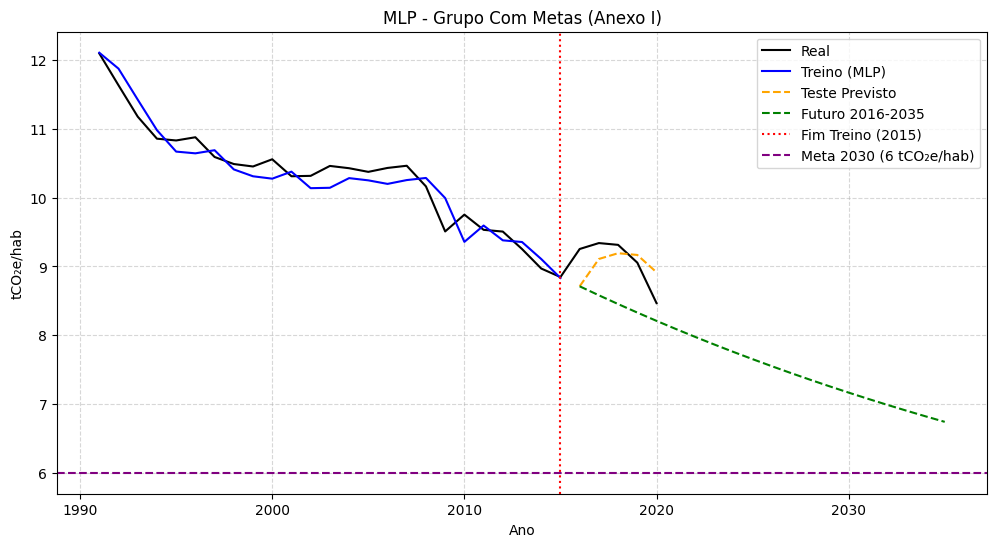

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


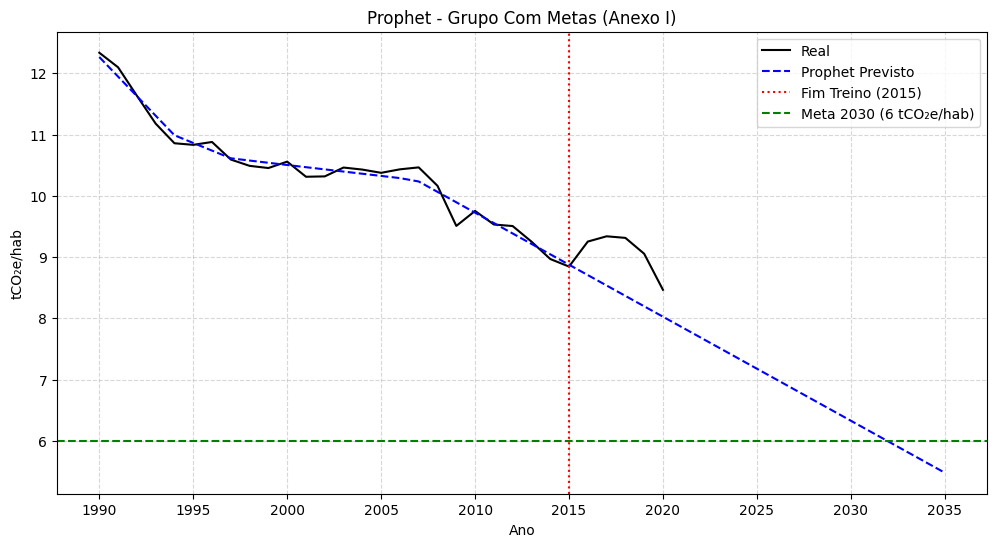

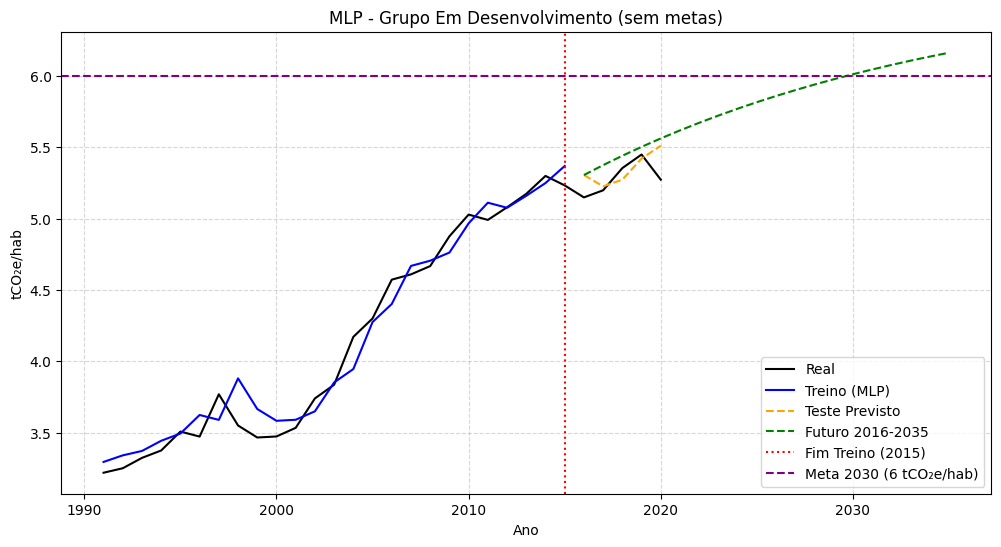

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


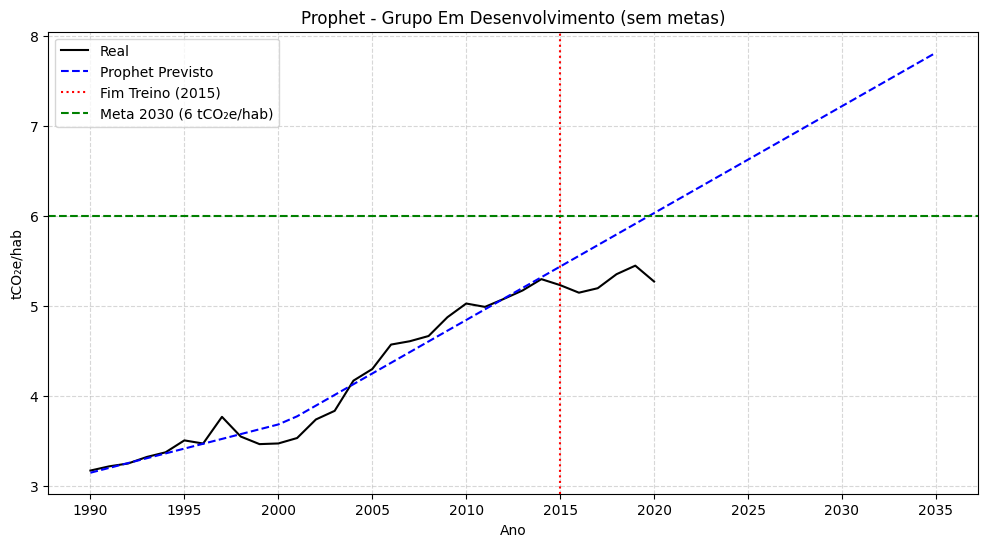

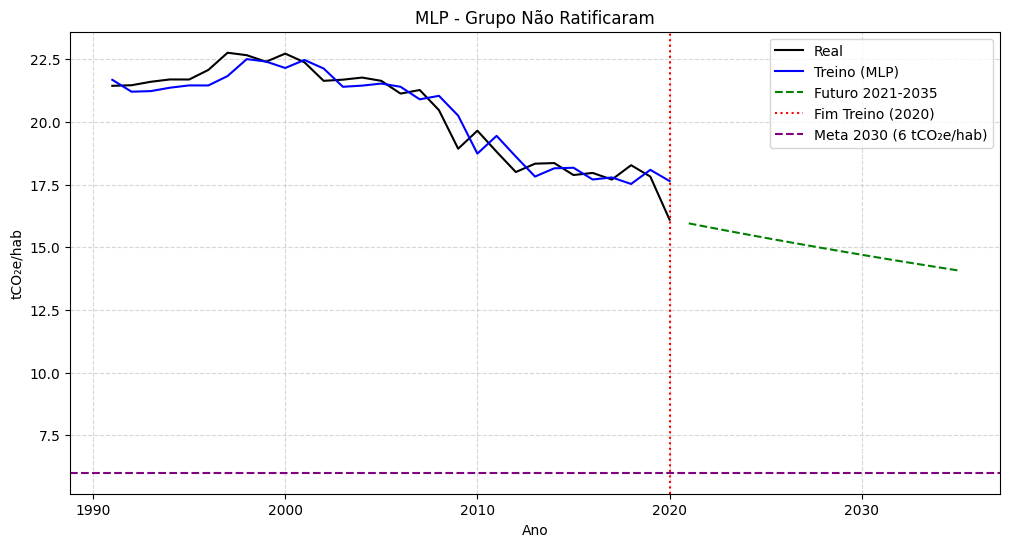

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


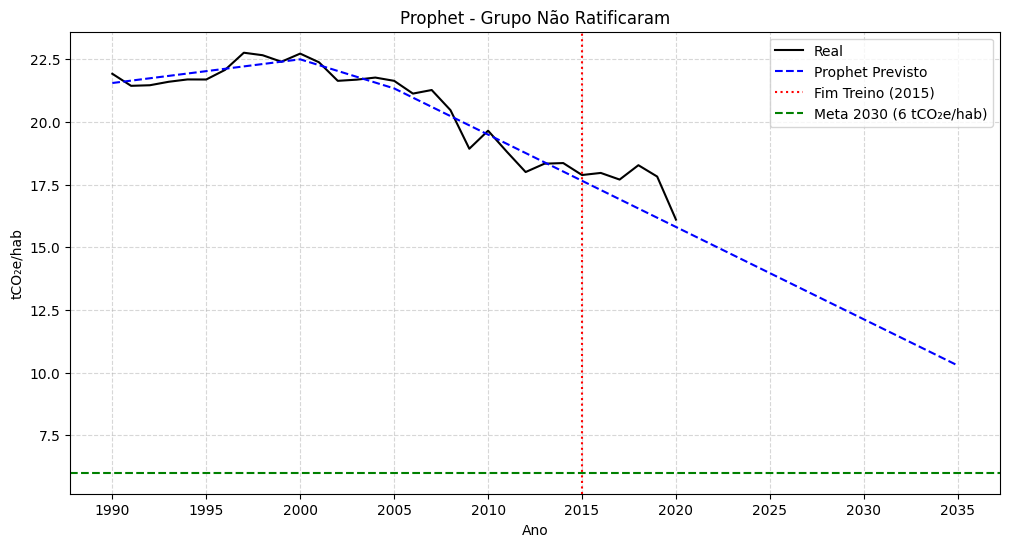

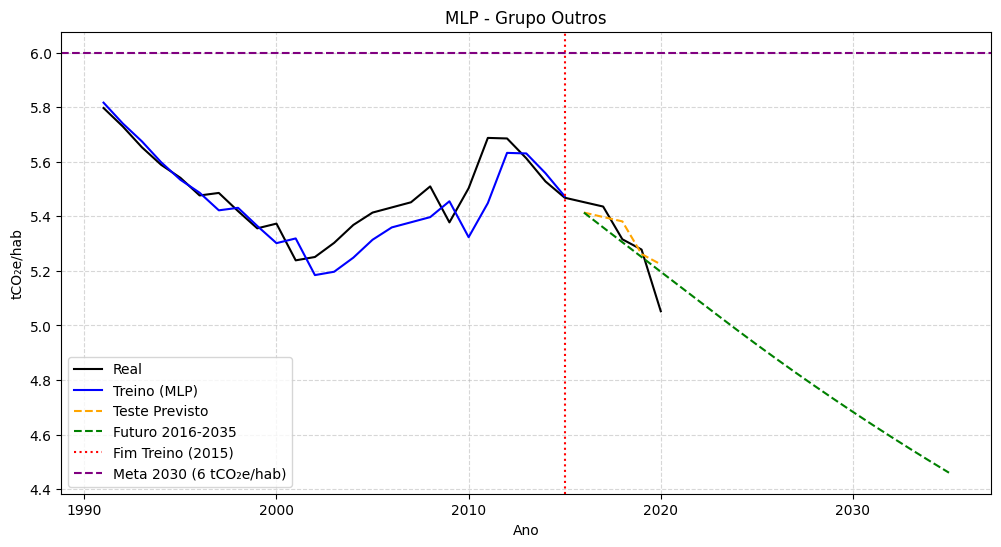

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


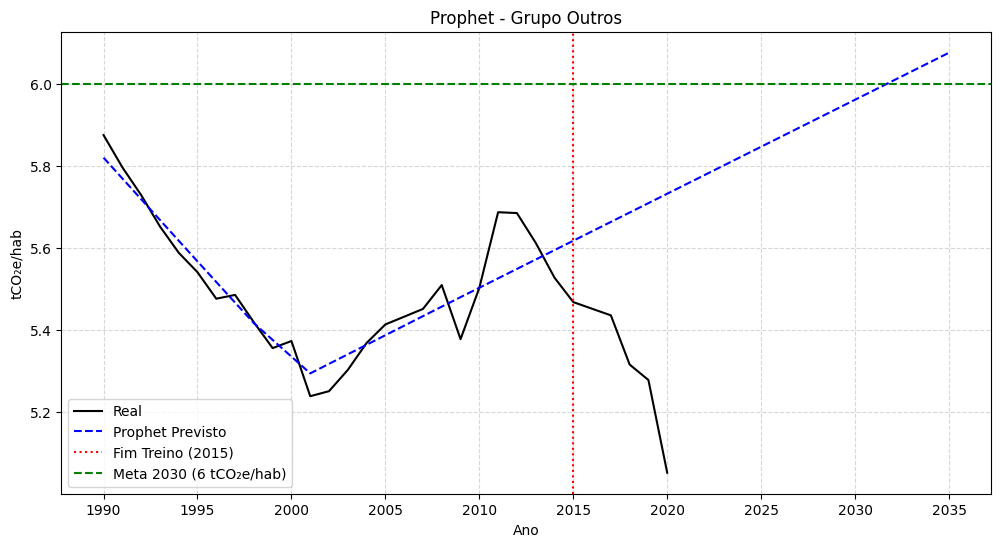

{'y_true': 0    5.452126
 1    5.435963
 2    5.315897
 3    5.278178
 4    5.051942
 Name: y, dtype: float64,
 'y_pred': 0    5.663895
 1    5.686823
 2    5.709751
 3    5.732679
 4    5.755670
 Name: yhat, dtype: float64}

In [149]:
janela = 1
plot_mlp_grupo(df_grp, "Com Metas (Anexo I)", ano_treino_fim=2015, ano_fim=2035, k=janela)
plot_prophet_grupo(df_grp, "Com Metas (Anexo I)", ano_treino_fim=2015, ano_fim=2035)


plot_mlp_grupo(df_grp, "Em Desenvolvimento (sem metas)", ano_treino_fim=2015, ano_fim=2035, k=janela)
plot_prophet_grupo(df_grp, "Em Desenvolvimento (sem metas)", ano_treino_fim=2015, ano_fim=2035)

plot_mlp_grupo(df_grp, "Não Ratificaram", ano_treino_fim=2020, ano_fim=2035, k=janela)
plot_prophet_grupo(df_grp, "Não Ratificaram", ano_treino_fim=2015, ano_fim=2035)


plot_mlp_grupo(df_grp, "Outros", ano_treino_fim=2015, ano_fim=2035, k=janela)
plot_prophet_grupo(df_grp, "Outros", ano_treino_fim=2015, ano_fim=2035)


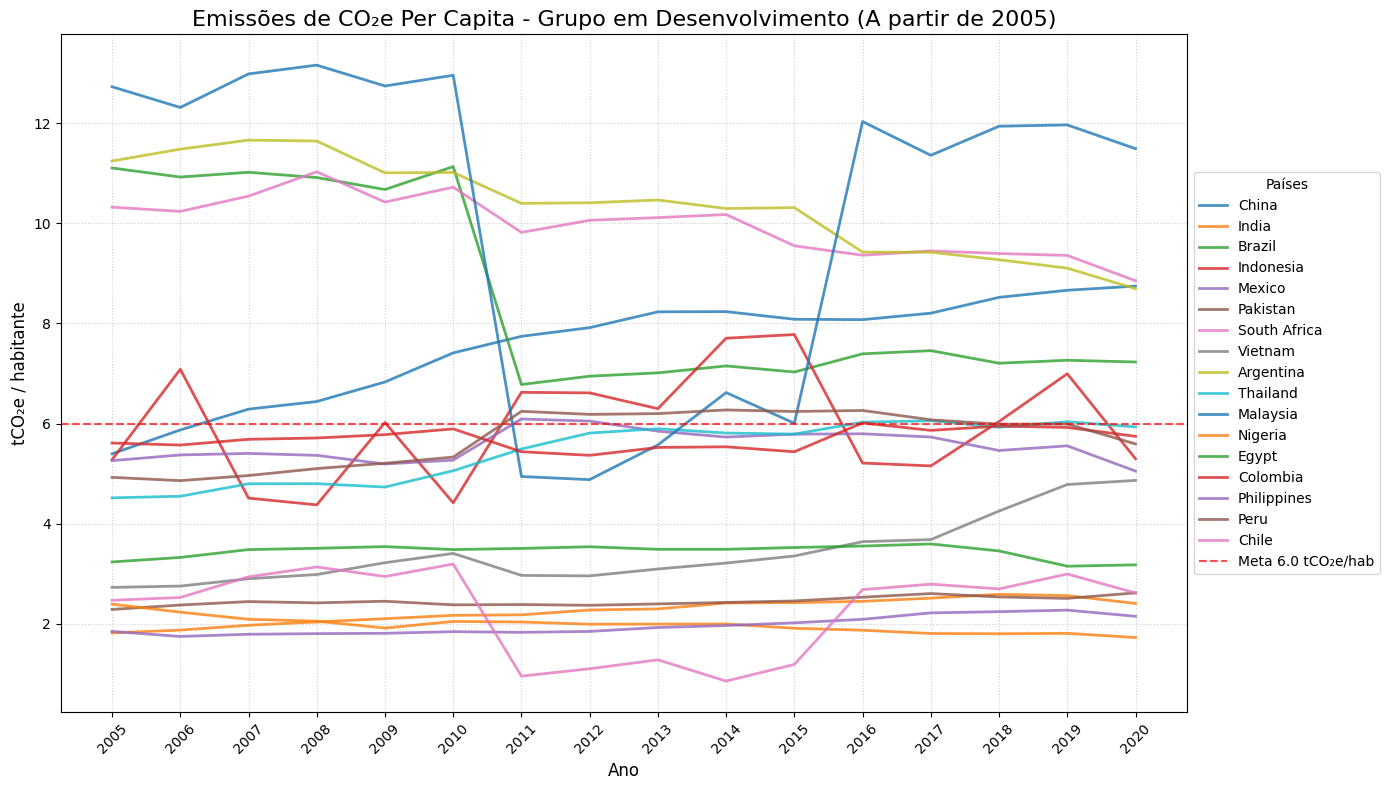

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Definições e Filtro de Dados
# Use the correct group name from the dataframe
GRUPO_DESENVOLVIMENTO = 'Em Desenvolvimento (sem metas)'
ANO_INICIAL = 2005

# Calculate per capita emissions and add to df_merged if not already present
if 'percapita_t' not in df_merged.columns:
    # Ensure 'emissoes_t' is calculated and exists
    if 'emissoes_t' not in df_merged.columns:
        df_merged["emissoes_t"] = df_merged["emissoes"] * 1_000_000

    # Calculate per capita emissions
    # Avoid division by zero if population is 0 or NaN
    df_merged['percapita_t'] = df_merged.apply(
        lambda row: (row['emissoes_t'] / row['populacao']) if row['populacao'] > 0 else 0,
        axis=1
    )


# Filter the DataFrame for the group and period of interest, using the correct DataFrame
df_plot = df_merged[
    (df_merged['grupo_quioto'] == GRUPO_DESENVOLVIMENTO) &
    (df_merged['ano'] >= ANO_INICIAL)
].copy()

# 2. Configuração do Plot
plt.figure(figsize=(14, 8))

# 3. Plotagem das Séries Temporais
# Agrupa por país e plota a série temporal for each one
paises = df_plot['pais_regiao'].unique() # Use 'pais_regiao' instead of 'country'

for pais in paises:
    data = df_plot[df_plot['pais_regiao'] == pais] # Use 'pais_regiao' instead of 'country'
    # Usamos alpha (transparência) para não sobrecarregar visualmente
    # e linestyle 'solid' para as séries observadas.
    plt.plot(data['ano'], data['percapita_t'], label=pais, alpha=0.8, linewidth=2)

# 4. Adição de Linhas de Referência e Estilização
plt.title(f'Emissões de CO₂e Per Capita - Grupo em Desenvolvimento (A partir de {ANO_INICIAL})', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('tCO₂e / habitante', fontsize=12)

# Linha de meta (se relevante para seu projeto)
plt.axhline(6.0, color='red', linestyle='--', label='Meta 6.0 tCO₂e/hab', linewidth=1.5, alpha=0.7) # Updated meta value to 4.0 for consistency with other plots

# Melhora a legenda e o grid
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Países")
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(sorted(df_plot['ano'].unique()), rotation=45) # Use sorted unique years from df_plot
plt.tight_layout() # Ajusta o layout para incluir a legenda

plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/valida

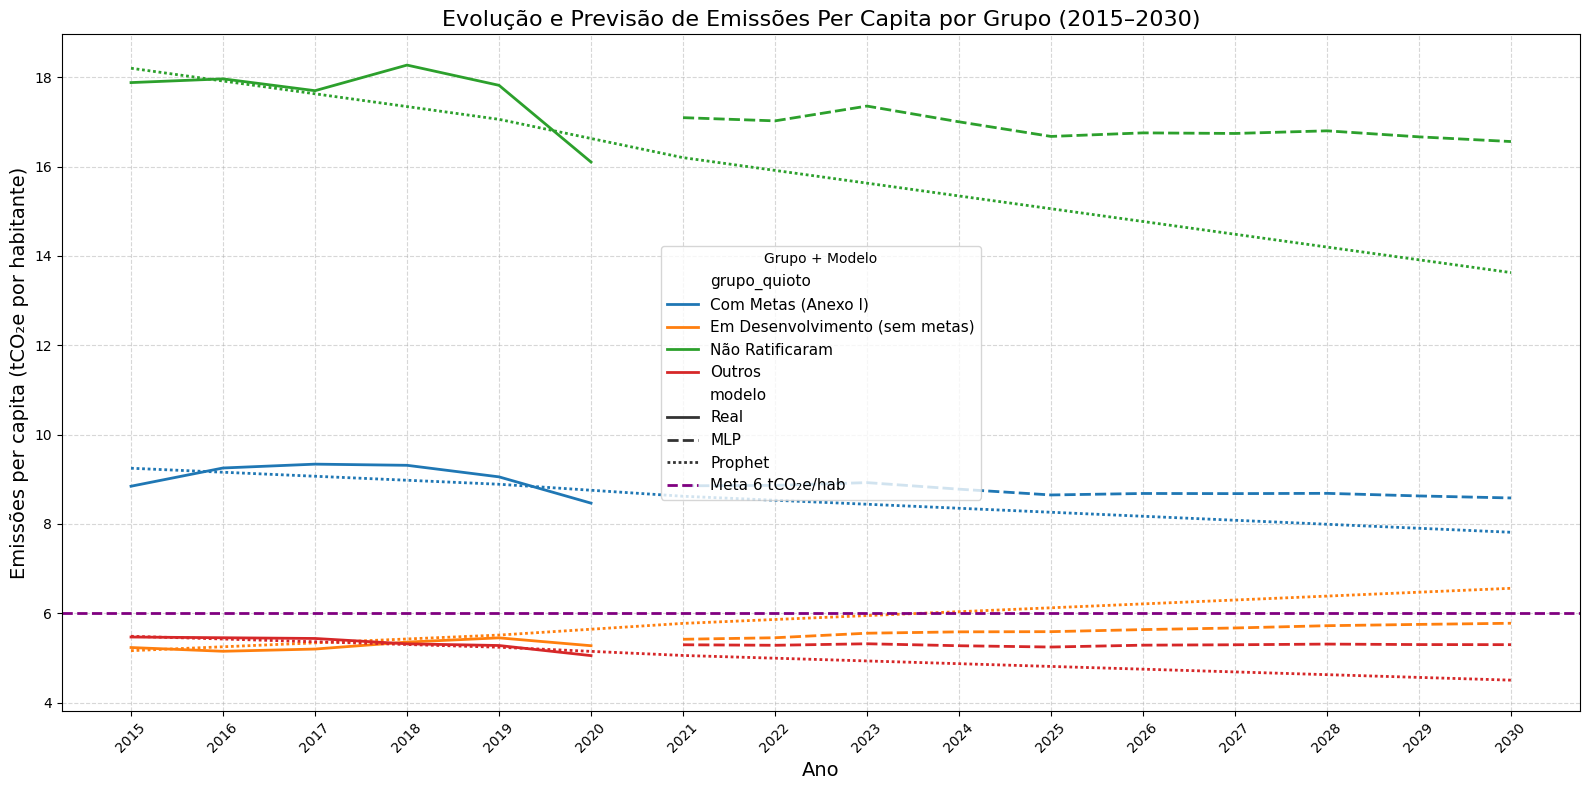

No test years available after the training end year (2020) in the real data.

RMSE Results (Test Period: 2021-2022):


In [162]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import seaborn as sns # Ensure seaborn is imported

# Function utilitária: criar lags para o MLP
def criar_lags(d, k=2, col_y="percapita_t"):
    d = d.copy()
    for lag in range(1, k+1):
        d[f"lag_{lag}"] = d[col_y].shift(lag)
    return d.dropna()

# Function: previsão com MLP
def prever_mlp(df, grupo, ano_fim_treino=2020, anos_futuro=2035, k=5): # Set default ano_fim_treino to 2020, k to 5
    d = df[df["grupo_quioto"]==grupo].copy().sort_values("ano")
    d = criar_lags(d, k=k)

    treino = d[d["ano"] <= ano_fim_treino]
    # No test set needed here for RMSE calculation in this function, as we'll do it later
    # teste  = d[d["ano"] > ano_fim_treino]

    previsoes = pd.DataFrame() # Initialize empty DataFrame

    if not treino.empty: # Ensure training data is not empty
        lag_cols = [f"lag_{i}" for i in range(1, k+1)]
        X_train, y_train = treino[lag_cols], treino["percapita_t"]

        # Re-create and train MLPRegressor for each group
        mlp = MLPRegressor(hidden_layer_sizes=(20,), max_iter=5000, random_state=42)
        mlp.fit(X_train, y_train)

        # Projeção futura recursiva até anos_futuro
        ultimos = d[d["ano"] <= ano_fim_treino].tail(k)
        window = list(ultimos["percapita_t"].values)

        # Start future prediction from the year after the last year in the original data, or ano_fim_treino + 1 if d is empty after dropna
        start_future_year = d["ano"].max() + 1 if not d.empty else ano_fim_treino + 1
        if start_future_year <= ano_fim_treino:
             start_future_year = ano_fim_treino + 1

        futuro_anos = list(range(start_future_year, anos_futuro+1))
        future_preds = []
        if not ultimos.empty and len(window) >= k: # Ensure enough data for initial window
          for ano in futuro_anos:
              X_new = np.array(window[-k:]).reshape(1,-1)
              y_new = mlp.predict(X_new)[0]
              future_preds.append({"ano": ano, "grupo_quioto": grupo, "percapita_t": y_new, "modelo":"MLP"})
              window.append(y_new)
        else:
            print(f"Insufficient data ({len(window)} points, need at least {k}) for future prediction for group: {grupo} after training end year: {ano_fim_treino}")

        previsoes = pd.DataFrame(future_preds)

    else:
        print(f"Insufficient training data for group: {grupo} with training end year: {ano_fim_treino}")


    # RMSE calculation will be done outside this function
    return previsoes, None # Return None for rmse here


# Function: previsão com Prophet
def prever_prophet(df, grupo, ano_fim_treino=2020, anos_futuro=2035): # Set default ano_fim_treino to 2020
    d = df[df["grupo_quioto"]==grupo][["ano","percapita_t"]].copy()
    d = d.rename(columns={"ano":"ds", "percapita_t":"y"})
    d["ds"] = pd.to_datetime(d["ds"], format="%Y")

    treino = d[d["ds"].dt.year <= ano_fim_treino]
    # No test set needed here for RMSE calculation in this function, as we'll do it later
    # teste = d[d["ds"].dt.year > ano_fim_treino].copy()

    prev = pd.DataFrame() # Initialize empty DataFrame
    rmse = None # Initialize rmse to None

    if not treino.empty: # Ensure training data is not empty
      model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
      model.fit(treino)

      # Create future dataframe including the test period
      future = model.make_future_dataframe(periods=(anos_futuro - d["ds"].dt.year.min()), freq="Y")
      forecast = model.predict(future)

      prev = forecast[["ds","yhat"]]
      prev["grupo_quioto"] = grupo
      prev["modelo"] = "Prophet"
      prev = prev.rename(columns={"ds":"ano", "yhat":"percapita_t"})
      prev["ano"] = prev["ano"].dt.year
    else:
        print(f"Insufficient training data for group: {grupo}")
        prev = pd.DataFrame() # Return empty DataFrame if training data is insufficient


    return prev, None # Return None for rmse here


# Rodando previsões para todos os grupos
resultados_preds = []
for grupo in df_grp["grupo_quioto"].unique():
    prev_mlp, _ = prever_mlp(df_grp, grupo) # Ignore RMSE returned by the function
    prev_prophet, _ = prever_prophet(df_grp, grupo) # Ignore RMSE returned by the function

    if not prev_mlp.empty:
      resultados_preds.append(prev_mlp)

    if not prev_prophet.empty:
      resultados_preds.append(prev_prophet)


df_prev = pd.concat(resultados_preds)

# Combine real and predicted data for plotting and RMSE calculation
df_real = df_grp.copy()
df_real["modelo"] = "Real"

df_combined = pd.concat([df_real, df_prev])

# Plotando com ajustes visuais
plt.figure(figsize=(16,8))

# Filtrar os dados entre 2015 e 2030
df_combined_filtered = df_combined[(df_combined["ano"] >= 2015) & (df_combined["ano"] <= 2030)]

sns.lineplot(
    data=df_combined_filtered,
    x="ano", y="percapita_t",
    hue="grupo_quioto", style="modelo", linewidth=2.0
)

# Linha da meta
plt.axhline(y=6, color="purple", linestyle="--", linewidth=2, label="Meta 6 tCO₂e/hab")

# Título e labels
plt.title("Evolução e Previsão de Emissões Per Capita por Grupo (2015–2030)", fontsize=16)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Emissões per capita (tCO₂e por habitante)", fontsize=14)

# Eixo X mostrando todos os anos
anos = list(range(2015, 2031))
plt.xticks(anos, rotation=45)

# Grid e legenda
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Grupo + Modelo", fontsize=11)
plt.tight_layout()
plt.show()


# Calculate and display RMSE for the test period (2021-2022 in this case, as training ends in 2020)
rmse_results = {}
test_years = df_grp[df_grp['ano'] > 2020]['ano'].unique() # Define test years based on available data after training end

if len(test_years) > 0:
    df_test_real = df_grp[df_grp['ano'].isin(test_years)].copy()

    for grupo in df_grp["grupo_quioto"].unique():
        df_test_grupo_real = df_test_real[df_test_real['grupo_quioto'] == grupo].sort_values('ano')

        if not df_test_grupo_real.empty:
            # Evaluate MLP
            df_test_grupo_mlp = df_prev[
                (df_prev['grupo_quioto'] == grupo) &
                (df_prev['modelo'] == 'MLP') &
                (df_prev['ano'].isin(test_years))
            ].sort_values('ano')

            if not df_test_grupo_mlp.empty:
                # Ensure both real and predicted data cover the same years for the group
                common_years_mlp = pd.merge(df_test_grupo_real, df_test_grupo_mlp, on='ano', how='inner')['ano']
                if not common_years_mlp.empty:
                    real_values_mlp = df_test_grupo_real[df_test_grupo_real['ano'].isin(common_years_mlp)]['percapita_t']
                    pred_values_mlp = df_test_grupo_mlp[df_test_grupo_mlp['ano'].isin(common_years_mlp)]['percapita_t']
                    if len(real_values_mlp) > 0:
                        rmse_mlp = mean_squared_error(real_values_mlp, pred_values_mlp) # Removed squared=False
                        rmse_results[f"{grupo}_MLP"] = rmse_mlp
                    else:
                        rmse_results[f"{grupo}_MLP"] = "N/A (No common test years)"
                else:
                    rmse_results[f"{grupo}_MLP"] = "N/A (No common test years)"
            else:
                rmse_results[f"{grupo}_MLP"] = "N/A (No MLP test data)"

            # Evaluate Prophet
            df_test_grupo_prophet = df_prev[
                (df_prev['grupo_quioto'] == grupo) &
                (df_prev['modelo'] == 'Prophet') &
                (df_prev['ano'].isin(test_years))
            ].sort_values('ano')

            if not df_test_grupo_prophet.empty:
                 # Ensure both real and predicted data cover the same years for the group
                common_years_prophet = pd.merge(df_test_grupo_real, df_test_grupo_prophet, on='ano', how='inner')['ano']
                if not common_years_prophet.empty:
                    real_values_prophet = df_test_grupo_real[df_test_grupo_real['ano'].isin(common_years_prophet)]['percapita_t']
                    pred_values_prophet = df_test_grupo_prophet[df_test_grupo_prophet['ano'].isin(common_years_prophet)]['percapita_t']
                    if len(real_values_prophet) > 0:
                        rmse_prophet = mean_squared_error(real_values_prophet, pred_values_prophet) # Removed squared=False
                        rmse_results[f"{grupo}_Prophet"] = rmse_prophet
                    else:
                        rmse_results[f"{grupo}_Prophet"] = "N/A (No common test years)"
                else:
                    rmse_results[f"{grupo}_Prophet"] = "N/A (No common test years)"
            else:
                rmse_results[f"{grupo}_Prophet"] = "N/A (No Prophet test data)"
        else:
             rmse_results[f"{grupo}_MLP"] = "N/A (No Real test data)"
             rmse_results[f"{grupo}_Prophet"] = "N/A (No Real test data)"
else:
    print("No test years available after the training end year (2020) in the real data.")


print("\nRMSE Results (Test Period: 2021-2022):")
for model_group, rmse_value in rmse_results.items():
    print(f"{model_group}: {rmse_value}")

In [95]:
import logging

# Configure logging to suppress INFO and DEBUG messages from cmdstanpy and prophet
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
logging.getLogger('prophet').setLevel(logging.WARNING)

print("Logging levels for cmdstanpy and prophet set to WARNING.")

Logging levels for cmdstanpy and prophet set to WARNING.
